# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings

In [2]:
# Import the libraries you will be using for analysis

!pip install pandas pyarrow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Dharm\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.24.4
pandas version: 2.0.3
matplotlib version: 3.3.4
seaborn version: 0.11.1


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('C:/Users/Dharm/AIML/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/Users/Dharm/AIML/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/')
##os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

yearly_sampled_df = []

# iterate through the list of files and sample one by one:
for file_name in file_list:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_df = pd.read_parquet(file_path)
        
        #pick datatime field
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'])
        
        #Extract the data and hours
        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour
        
        #Get unique dates in the month
        
        unique_dates = monthly_df['pickup_date'].unique()



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = [] ##monthly_sampled_df

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            daily_df = monthly_df[monthly_df['pickup_date'] == date]
            
            #sampled hourly data for this date
            sampled_day_df = []

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_df = daily_df[daily_df['pickup_hour'] == hour]

                # Sample 5% of the hourly data randomly
                if not hourly_df.empty:
                    sampled_hour = hourly_df.sample(frac=0.05 ,random_state=42)
                    sampled_day_df.append(sampled_hour)

            # add data of this hour to the dataframe
            if sampled_day_df:
                full_day_sample = pd.concat(sampled_day_df, ignore_index=True)
                sampled_data.append(full_day_sample)
        # concat 
        if sampled_data:
            full_month_sample = pd.concat(sampled_data,ignore_index=True)
            yearly_sampled_df.append(full_month_sample)

# Concatenate the sampled data of all the dates to a single dataframe
df = pd.concat(yearly_sampled_df, ignore_index=True)
print(f"\n Final sampled data shape: {df.shape}")
# we initialised this empty DF earlier
   # except Exception as e:
    #    print(f"Error reading file {file_name}: {e}")


 Final sampled data shape: (1996077, 22)


In [8]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
# df.to_parquet('')

df.to_parquet('sampled_yearly_data.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [10]:
# Load the new data file

df_sampled = pd.read_parquet("sampled_yearly_data.parquet")

In [11]:
 df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [12]:
 df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996077 entries, 0 to 1996076
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed
#drop pickup_date and pickup_hour fields

df_sampled = df_sampled.drop(columns='pickup_date')
df_sampled = df_sampled.drop(columns='pickup_hour')

# fix index as we had done concat operations

df_sampled = df_sampled.reset_index(drop=True)
df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [14]:
# Combine the two airport fee columns

df_sampled['airport_combined_fee'] = df_sampled['airport_fee'].fillna(0)+df_sampled['Airport_fee'].fillna(0)
df_sampled = df_sampled.drop(columns='airport_fee')
df_sampled = df_sampled.drop(columns='Airport_fee')
df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         41.15                   0.0   
1                    1.0         15.48                   2.5   
2                    1.0         16.40                   2.5   
3                    1.0         11.50                   2.5   
4                    1.0         35.57                   NaN   

   airport_combined_fee  
0                  1.25  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [15]:
# check where values of fare amount are negative
df_sampled[df_sampled['fare_amount']<0]

# print(df_sampled.shape)

# print(df_sampled[['fare_amount','trip_distance']].describe())

# selecting data with fare_amount >0 and trip distance >0

#df_sampled = df_sampled[(df_sampled['fare_amount']>0) & (df_sampled['trip_distance'] >0)]
#df_sampled

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_combined_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [16]:
# Analyse RatecodeID for the negative fare amounts
df_sampled['RatecodeID'].value_counts(dropna=False)


RatecodeID
1.0     1819984
2.0       75530
NaN       68361
99.0      11002
5.0       10847
3.0        6448
4.0        3902
6.0           3
Name: count, dtype: int64

In [17]:
# Find which columns have negative values

numeric_cols = df_sampled.select_dtypes(include='number').columns

negative_columns = [col for col in numeric_cols if (df_sampled[col] < 0).any()]

negative_columns


['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_combined_fee']

In [18]:
# fix these negative values

# converting the negative value to positive values, as there won't be case where a charge can be negative expect discounts

for col in negative_columns:
    df_sampled[col] = df_sampled[col].abs()
    
df_sampled.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         41.15                   0.0   
1                    1.0         15.48                   2.5   
2                    1.0         16.40                   2.5   
3                    1.0         11.50                   2.5   
4                    1.0         35.57                   NaN   

   airport_combined_fee  
0                  1.25  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [19]:
# Find the proportion of missing values in each column
missing_proportions = df_sampled.isna().mean().sort_values(ascending=False)

# Display as percentages
missing_percent = (missing_proportions * 100).round(2)

missing_percent


congestion_surcharge     3.42
passenger_count          3.42
RatecodeID               3.42
store_and_fwd_flag       3.42
VendorID                 0.00
extra                    0.00
total_amount             0.00
improvement_surcharge    0.00
tolls_amount             0.00
tip_amount               0.00
mta_tax                  0.00
payment_type             0.00
fare_amount              0.00
tpep_pickup_datetime     0.00
DOLocationID             0.00
PULocationID             0.00
trip_distance            0.00
tpep_dropoff_datetime    0.00
airport_combined_fee     0.00
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [20]:
# Display the rows with null values

df_sampled[df_sampled['passenger_count'].isnull()]
# Impute NaN values in 'passenger_count'

df_sampled['passenger_count'] = df_sampled['passenger_count'].fillna(df_sampled['passenger_count'].median())

df_sampled.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  \
0                    1.0         41.15                   0.0   
1                    1.0         15.48                   2.5   
2                    1.0         16.40                   2.5   
3                    1.0         11.50                   2.5   
4                    1.0         35.57                   NaN   

   airport_combined_fee  
0                  1.25  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [21]:
# Fix missing values in 'RatecodeID'

df_sampled[df_sampled['RatecodeID'].isnull()]


# On obeservation for the all the NaN RatecodeID's i see the payment type as 0. I am fixing the values with 1 as standard Rate code

df_sampled['RatecodeID'] = df_sampled['RatecodeID'].fillna(1)
df_sampled['RatecodeID'] = df_sampled['RatecodeID'].astype(int)
df_sampled['RatecodeID']

0          1
1          1
2          1
3          1
4          1
          ..
1996072    1
1996073    1
1996074    1
1996075    1
1996076    1
Name: RatecodeID, Length: 1996077, dtype: int32

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [22]:
# handle null values in congestion_surcharge

df_sampled[df_sampled['congestion_surcharge'].isnull()]


df_sampled['congestion_surcharge'] = df_sampled['congestion_surcharge'].fillna(0.0)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [23]:
# Handle any remaining missing values
df_sampled[df_sampled['store_and_fwd_flag'].isnull()]

df_sampled['store_and_fwd_flag'].value_counts(dropna=False)

# Fixing None values with 'N' as it makes sense to keep N as it is not known if they had stored it or not.

df_sampled['store_and_fwd_flag'] = df_sampled['store_and_fwd_flag'].fillna('N')
df_sampled['store_and_fwd_flag'].value_counts(dropna=False)

store_and_fwd_flag
N    1984242
Y      11835
Name: count, dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [24]:
# Describe the data and check if there are any potential outliers present

df_sampled.describe()
# Check for potential out of place values in various columns

df_sampled['passenger_count'].value_counts(dropna=False).sort_index()

df_sampled['trip_distance'].describe().sort_index()


25%      1.050000e+00
50%      1.790000e+00
75%      3.400000e+00
count    1.996077e+06
max      1.263605e+05
mean     3.860377e+00
min      0.000000e+00
std      1.281454e+02
Name: trip_distance, dtype: float64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [25]:
# remove passenger_count > 6

df_sampled = df_sampled[df_sampled['passenger_count'] <=6]

df_sampled['passenger_count'].value_counts()


passenger_count
1.0    1517965
2.0     291947
3.0      72569
4.0      40615
0.0      31194
5.0      25088
6.0      16674
Name: count, dtype: int64

In [26]:
# Continue with outlier handling

#Removing Entries where trip_distance is nearly 0 and fare_amount is more than 300

df_sampled = df_sampled[~((df_sampled['trip_distance'] < 0.1) & (df_sampled['fare_amount'] > 300))]

df_sampled

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
...           ...                  ...                   ...              ...   
1996072         2  2023-09-29 23:39:12   2023-09-29 23:55:07              5.0   
1996073         2  2023-09-29 23:26:39   2023-09-29 23:46:16              1.0   
1996074         1  2023-09-29 23:10:24   2023-09-29 23:17:47              1.0   
1996075         1  2023-09-29 23:42:35   2023-09-30 00:01:34              1.0   
1996076         2  2023-09-29 23:42:53   2023-09-30 00:03:59              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74           1                  N           138   
1                 1.24           1                  N           161   
2                 1.44           1                  N           237   
3                 0.54           1                  N           143   
4                19.24           1                  N            66   
...                ...         ...                ...           ...   
1996072           3.32           1                  N           249   
1996073           5.89           1                  N           148   
1996074           1.30           1                  N            45   
1996075           9.50           1                  N           138   
1996076           4.05           1                  N           148   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 256             2        32.40   6.00      0.5        0.00   
1                 237             1         7.90   1.00      0.5        2.58   
2                 141             2        11.40   1.00      0.5        0.00   
3                 142             2         6.50   1.00      0.5        0.00   
4                 107             0        25.64   0.00      0.5        5.93   
...               ...           ...          ...    ...      ...         ...   
1996072            48             1        18.40   1.00      0.5        4.68   
1996073           236             1        27.50   1.00      0.5        6.50   
1996074            79             2         9.30   3.50      0.5        0.00   
1996075           229             1        38.70  10.25      0.5        3.00   
1996076            50             1        22.60   1.00      0.5        5.52   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         41.15   
1                0.00                    1.0         15.48   
2                0.00                    1.0         16.40   
3                0.00                    1.0         11.50   
4                0.00                    1.0         35.57   
...               ...                    ...           ...   
1996072          0.00                    1.0         28.08   
1996073          0.00                    1.0         39.00   
1996074          0.00                    1.0         14.30   
1996075          6.94                    1.0         60.39   
1996076          0.00                    1.0         33.12   

         congestion_surcharge  airport_combined_fee  
0                         0.0                  1.25  
1                         2.5                  0.00  
2                         2.5                  0.00  
3                         2.5                  0.00  
4                         0.0                  0.00  
...                       ...                   ...  
1996072                   2.5                  0.00  
1996073                   2.5                

In [27]:
# Do any columns need standardising?

# Identify the records where both trip_distance and fare_amount are 0, and pickup and dropoff zones are different
invalid_entries = df_sampled[
    (df_sampled['trip_distance'] == 0) & 
    (df_sampled['fare_amount'] == 0) & 
    (df_sampled['PULocationID'] != df_sampled['DOLocationID'])
]

# Drop these entries
df_sampled = df_sampled.drop(invalid_entries.index)

df_sampled

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
...           ...                  ...                   ...              ...   
1996072         2  2023-09-29 23:39:12   2023-09-29 23:55:07              5.0   
1996073         2  2023-09-29 23:26:39   2023-09-29 23:46:16              1.0   
1996074         1  2023-09-29 23:10:24   2023-09-29 23:17:47              1.0   
1996075         1  2023-09-29 23:42:35   2023-09-30 00:01:34              1.0   
1996076         2  2023-09-29 23:42:53   2023-09-30 00:03:59              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74           1                  N           138   
1                 1.24           1                  N           161   
2                 1.44           1                  N           237   
3                 0.54           1                  N           143   
4                19.24           1                  N            66   
...                ...         ...                ...           ...   
1996072           3.32           1                  N           249   
1996073           5.89           1                  N           148   
1996074           1.30           1                  N            45   
1996075           9.50           1                  N           138   
1996076           4.05           1                  N           148   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 256             2        32.40   6.00      0.5        0.00   
1                 237             1         7.90   1.00      0.5        2.58   
2                 141             2        11.40   1.00      0.5        0.00   
3                 142             2         6.50   1.00      0.5        0.00   
4                 107             0        25.64   0.00      0.5        5.93   
...               ...           ...          ...    ...      ...         ...   
1996072            48             1        18.40   1.00      0.5        4.68   
1996073           236             1        27.50   1.00      0.5        6.50   
1996074            79             2         9.30   3.50      0.5        0.00   
1996075           229             1        38.70  10.25      0.5        3.00   
1996076            50             1        22.60   1.00      0.5        5.52   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         41.15   
1                0.00                    1.0         15.48   
2                0.00                    1.0         16.40   
3                0.00                    1.0         11.50   
4                0.00                    1.0         35.57   
...               ...                    ...           ...   
1996072          0.00                    1.0         28.08   
1996073          0.00                    1.0         39.00   
1996074          0.00                    1.0         14.30   
1996075          6.94                    1.0         60.39   
1996076          0.00                    1.0         33.12   

         congestion_surcharge  airport_combined_fee  
0                         0.0                  1.25  
1                         2.5                  0.00  
2                         2.5                  0.00  
3                         2.5                  0.00  
4                         0.0                  0.00  
...                       ...                   ...  
1996072                   2.5                  0.00  
1996073                   2.5                

In [28]:
#Drop Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)

df_sampled = df_sampled[df_sampled['payment_type'] != 0]

df_sampled

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
...           ...                  ...                   ...              ...   
1996072         2  2023-09-29 23:39:12   2023-09-29 23:55:07              5.0   
1996073         2  2023-09-29 23:26:39   2023-09-29 23:46:16              1.0   
1996074         1  2023-09-29 23:10:24   2023-09-29 23:17:47              1.0   
1996075         1  2023-09-29 23:42:35   2023-09-30 00:01:34              1.0   
1996076         2  2023-09-29 23:42:53   2023-09-30 00:03:59              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74           1                  N           138   
1                 1.24           1                  N           161   
2                 1.44           1                  N           237   
3                 0.54           1                  N           143   
5                 7.10           1                  N           246   
...                ...         ...                ...           ...   
1996072           3.32           1                  N           249   
1996073           5.89           1                  N           148   
1996074           1.30           1                  N            45   
1996075           9.50           1                  N           138   
1996076           4.05           1                  N           148   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 256             2         32.4   6.00      0.5        0.00   
1                 237             1          7.9   1.00      0.5        2.58   
2                 141             2         11.4   1.00      0.5        0.00   
3                 142             2          6.5   1.00      0.5        0.00   
5                  37             1         34.5   3.50      0.5        7.90   
...               ...           ...          ...    ...      ...         ...   
1996072            48             1         18.4   1.00      0.5        4.68   
1996073           236             1         27.5   1.00      0.5        6.50   
1996074            79             2          9.3   3.50      0.5        0.00   
1996075           229             1         38.7  10.25      0.5        3.00   
1996076            50             1         22.6   1.00      0.5        5.52   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         41.15   
1                0.00                    1.0         15.48   
2                0.00                    1.0         16.40   
3                0.00                    1.0         11.50   
5                0.00                    1.0         47.40   
...               ...                    ...           ...   
1996072          0.00                    1.0         28.08   
1996073          0.00                    1.0         39.00   
1996074          0.00                    1.0         14.30   
1996075          6.94                    1.0         60.39   
1996076          0.00                    1.0         33.12   

         congestion_surcharge  airport_combined_fee  
0                         0.0                  1.25  
1                         2.5                  0.00  
2                         2.5                  0.00  
3                         2.5                  0.00  
5                         2.5                  0.00  
...                       ...                   ...  
1996072                   2.5                  0.00  
1996073                   2.5                

In [29]:
#Drop Entries where trip distance is >=250

df_sampled = df_sampled[df_sampled['trip_distance'] <250]

df_sampled

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
...           ...                  ...                   ...              ...   
1996072         2  2023-09-29 23:39:12   2023-09-29 23:55:07              5.0   
1996073         2  2023-09-29 23:26:39   2023-09-29 23:46:16              1.0   
1996074         1  2023-09-29 23:10:24   2023-09-29 23:17:47              1.0   
1996075         1  2023-09-29 23:42:35   2023-09-30 00:01:34              1.0   
1996076         2  2023-09-29 23:42:53   2023-09-30 00:03:59              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74           1                  N           138   
1                 1.24           1                  N           161   
2                 1.44           1                  N           237   
3                 0.54           1                  N           143   
5                 7.10           1                  N           246   
...                ...         ...                ...           ...   
1996072           3.32           1                  N           249   
1996073           5.89           1                  N           148   
1996074           1.30           1                  N            45   
1996075           9.50           1                  N           138   
1996076           4.05           1                  N           148   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 256             2         32.4   6.00      0.5        0.00   
1                 237             1          7.9   1.00      0.5        2.58   
2                 141             2         11.4   1.00      0.5        0.00   
3                 142             2          6.5   1.00      0.5        0.00   
5                  37             1         34.5   3.50      0.5        7.90   
...               ...           ...          ...    ...      ...         ...   
1996072            48             1         18.4   1.00      0.5        4.68   
1996073           236             1         27.5   1.00      0.5        6.50   
1996074            79             2          9.3   3.50      0.5        0.00   
1996075           229             1         38.7  10.25      0.5        3.00   
1996076            50             1         22.6   1.00      0.5        5.52   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         41.15   
1                0.00                    1.0         15.48   
2                0.00                    1.0         16.40   
3                0.00                    1.0         11.50   
5                0.00                    1.0         47.40   
...               ...                    ...           ...   
1996072          0.00                    1.0         28.08   
1996073          0.00                    1.0         39.00   
1996074          0.00                    1.0         14.30   
1996075          6.94                    1.0         60.39   
1996076          0.00                    1.0         33.12   

         congestion_surcharge  airport_combined_fee  
0                         0.0                  1.25  
1                         2.5                  0.00  
2                         2.5                  0.00  
3                         2.5                  0.00  
5                         2.5                  0.00  
...                       ...                   ...  
1996072                   2.5                  0.00  
1996073                   2.5                

In [30]:
df_sampled.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.927575e+06                     1927575                     1927575   
mean   1.736358e+00  2023-07-01 21:30:37.569023  2023-07-01 21:47:59.595655   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 20:22:57         2023-04-01 20:37:15   
50%    2.000000e+00         2023-06-26 08:44:58         2023-06-26 09:01:38   
75%    2.000000e+00         2023-10-05 19:22:52  2023-10-05 19:41:08.500000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.406073e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.927575e+06   1.927575e+06  1.927575e+06  1.927575e+06   
mean      1.369078e+00   3.444851e+00  1.633146e+00  1.654673e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.370000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   2.048600e+02  9.900000e+01  2.650000e+02   
std       8.922457e-01   4.546044e+00  7.384185e+00  6.366813e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.927575e+06  1.927575e+06  1.927575e+06  1.927575e+06  1.927575e+06   
mean   1.643462e+02  1.205047e+00  1.981095e+01  1.638097e+00  4.953570e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  1.425000e+01  4.000000e+00   
std    6.974192e+01  4.665374e-01  1.047057e+02  1.836043e+00  4.826112e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.927575e+06  1.927575e+06           1.927575e+06  1.927575e+06   
mean   3.572617e+00  5.963597e-01           9.993240e-01  2.893431e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.070000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.068523e+00  2.185335e+00           2.412114e-02  1.056053e+02   

       congestion_surcharge  airport_combined_fee  
count          1.927575e+06          1.927575e+06  
mean           2.307958e+00          1.429234e-01  
min            0.000000e+00          0.000000e+00  
25%            2.500000e+00          0.000000e+00  
50%            2.500000e+00          0.000000e+00  
75%            2.500000e+00          0.000000e+00  
max            2.500000e+00          1.750000e+00  
std            6.657504e-01          4.648647e-01

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [31]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`:Categorical and Numerical
* `tpep_dropoff_datetime`:Categorical and Numerical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

##Numerical

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<ipython-input-32-572cf45e43ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled['pickup_hour'] = df_sampled['tpep_pickup_datetime'].dt.hour


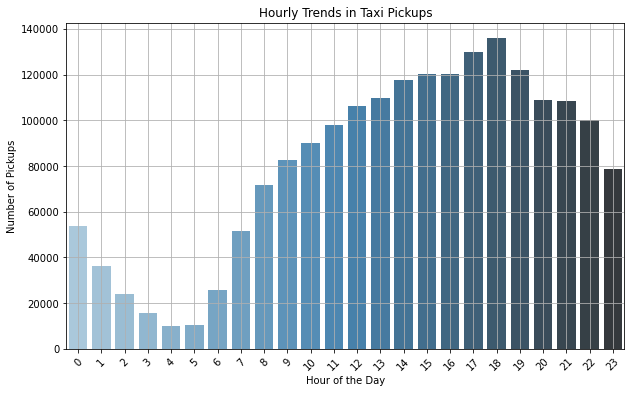

In [32]:
# Find and show the hourly trends in taxi pickups

# Extract the hour from tpep_pickup_datetime and create the pickup_hour field
df_sampled['pickup_hour'] = df_sampled['tpep_pickup_datetime'].dt.hour

hourly_trends = df_sampled.groupby('pickup_hour').size().reset_index(name='pickup_count')

# Bar plot of hourly trends
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_trends, x='pickup_hour', y='pickup_count', palette='Blues_d')

plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24), rotation=45)
plt.grid(True)
plt.show()

<ipython-input-33-4cbb898c2837>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled['pickup_day_of_week'] = df_sampled['tpep_pickup_datetime'].dt.dayofweek


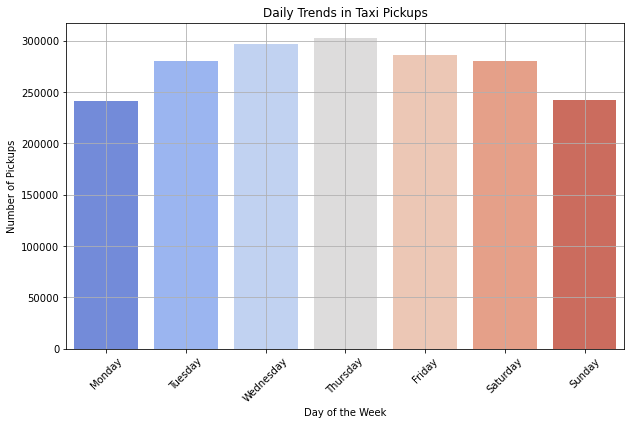

In [33]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract the day of the week from tpep_pickup_datetime and create the pickup_day_of_week field
df_sampled['pickup_day_of_week'] = df_sampled['tpep_pickup_datetime'].dt.dayofweek


# Group by day of the week and count the number of pickups
daily_trends = df_sampled.groupby('pickup_day_of_week').size().reset_index(name='pickup_count')

# Map day numbers to actual names for easier interpretation
daily_trends['pickup_day_of_week'] = daily_trends['pickup_day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Bar plot of daily trends in taxi pickups
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_trends, x='pickup_day_of_week', y='pickup_count', palette='coolwarm')

plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-34-792bc606b17f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled['pickup_month'] = df_sampled['tpep_pickup_datetime'].dt.month


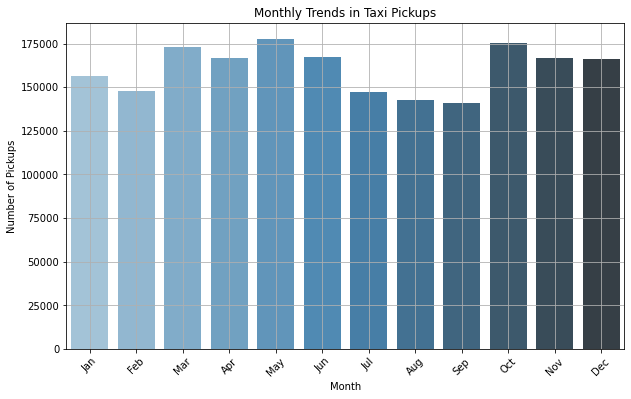

In [34]:
# Show the monthly trends in pickups

# Extract the month from tpep_pickup_datetime and create the pickup_month field
df_sampled['pickup_month'] = df_sampled['tpep_pickup_datetime'].dt.month

# Group by month and count the number of pickups
monthly_trends = df_sampled.groupby('pickup_month').size().reset_index(name='pickup_count')

# Bar plot of monthly trends in taxi pickups
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_trends, x='pickup_month', y='pickup_count', palette='Blues_d')

plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [35]:
# Analyse the above parameters

# Check for zero or negative values in financial columns
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a mask to find zero or negative values
negative_values = df_sampled[financial_columns].lt(0).sum()  # for negative values
zero_values = df_sampled[financial_columns].eq(0).sum()  # for zero values

# Display the results
print("Number of negative values in financial columns:")
print(negative_values)

print("\nNumber of zero values in financial columns:")
print(zero_values)

Number of negative values in financial columns:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64

Number of zero values in financial columns:
fare_amount         602
tip_amount       431848
total_amount        271
trip_distance     24109
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [36]:
# Create a df with non zero entries for the selected parameters.
# Filter out rows with zero or negative values in financial columns, but keep zero trip distances
df_filtered = df_sampled[
    (df_sampled['fare_amount'] > 0) & 
    (df_sampled['tip_amount'] >= 0) & 
    (df_sampled['total_amount'] > 0) & 
    (df_sampled['trip_distance'] >= 0)
]

# Verify the filtering
print(df_filtered[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe())


        fare_amount    tip_amount  total_amount  trip_distance
count  1.926973e+06  1.926973e+06  1.926973e+06   1.926973e+06
mean   1.981714e+01  3.573352e+00  2.894233e+01   3.444888e+00
std    1.047215e+02  4.064969e+00  1.056206e+02   4.543859e+00
min    1.000000e-02  0.000000e+00  1.010000e+00   0.000000e+00
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.050000e+00
50%    1.350000e+01  2.860000e+00  2.100000e+01   1.780000e+00
75%    2.190000e+01  4.450000e+00  3.070000e+01   3.370000e+00
max    1.431635e+05  2.230800e+02  1.431675e+05   2.048600e+02


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

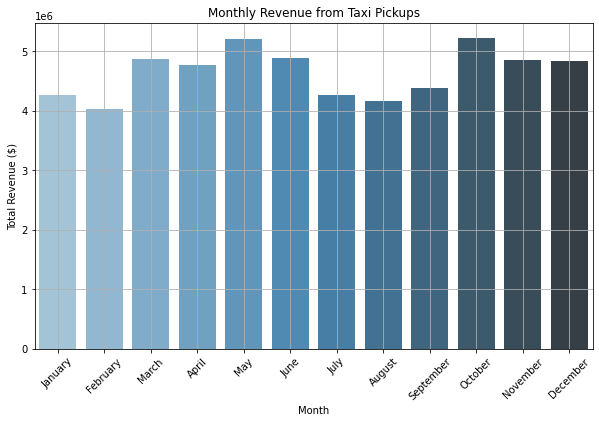

In [37]:
# Group data by month and analyse monthly revenue

# Group by month and calculate the total revenue (sum of total_amount)
monthly_revenue = df_filtered.groupby('pickup_month')['total_amount'].sum().reset_index(name='total_revenue')

# Map month numbers to month names for better readability
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Bar plot of monthly revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_revenue, x='pickup_month', y='total_revenue', palette='Blues_d')

plt.title('Monthly Revenue from Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<ipython-input-38-5e45e76f9a65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['quarter'] = df_filtered['pickup_month'].map({


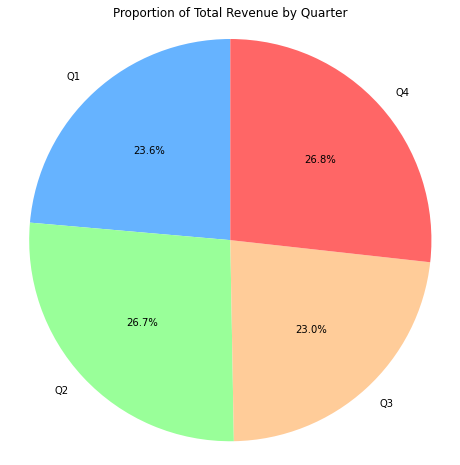

In [38]:
# Calculate proportion of each quarter
# Create a new column for quarter based on pickup month
df_filtered['quarter'] = df_filtered['pickup_month'].map({
    1: 'Q1', 2: 'Q1', 3: 'Q1',
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
})

# Group by quarter and calculate the total revenue for each quarter
quarterly_revenue = df_filtered.groupby('quarter')['total_amount'].sum().reset_index(name='total_revenue')

# Calculate the total revenue for the entire year
total_revenue_year = quarterly_revenue['total_revenue'].sum()

# Calculate the proportion of each quarter's revenue
quarterly_revenue['revenue_proportion'] = (quarterly_revenue['total_revenue'] / total_revenue_year) * 100

# Pie chart of revenue proportion by quarter
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue['revenue_proportion'], labels=quarterly_revenue['quarter'], 
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'])
plt.title('Proportion of Total Revenue by Quarter')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [39]:
# Filter out trips with trip_distance = 0
df_filtered_nonzero_distance = df_filtered[df_filtered['trip_distance'] > 0]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for fare_amount
Q1 = df_filtered_nonzero_distance['fare_amount'].quantile(0.25)
Q3 = df_filtered_nonzero_distance['fare_amount'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered_no_outliers = df_filtered_nonzero_distance[
    (df_filtered_nonzero_distance['fare_amount'] >= lower_bound) & 
    (df_filtered_nonzero_distance['fare_amount'] <= upper_bound)
]

# Verify the data after removing outliers
print(df_filtered_no_outliers[['fare_amount']].describe())

        fare_amount
count  1.707686e+06
mean   1.461517e+01
std    7.849565e+00
min    1.000000e-02
25%    8.600000e+00
50%    1.280000e+01
75%    1.840000e+01
max    4.080000e+01


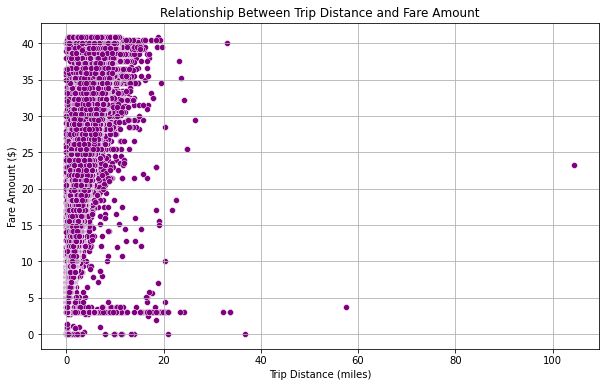

In [40]:
# Show how trip fare is affected by distance



# Scatter plot of trip_distance vs fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_no_outliers, x='trip_distance', y='fare_amount', color='purple')

plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

<ipython-input-41-d27b3ec2e528>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['trip_duration'] = (df_filtered_no_outliers['tpep_dropoff_datetime'] - df_filtered_no_outliers['tpep_pickup_datetime']).dt.total_seconds() / 60


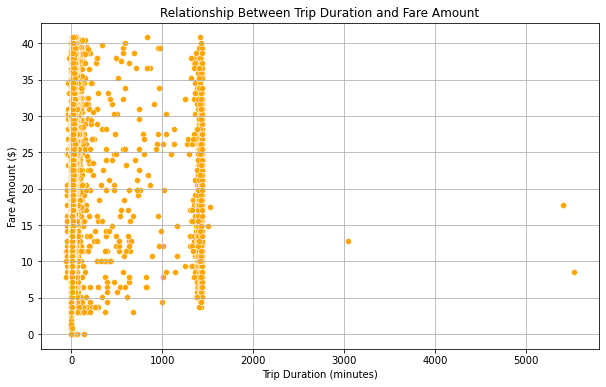

In [41]:
# Show relationship between fare and trip duration
# Calculate trip duration in minutes
df_filtered_no_outliers['trip_duration'] = (df_filtered_no_outliers['tpep_dropoff_datetime'] - df_filtered_no_outliers['tpep_pickup_datetime']).dt.total_seconds() / 60

# Scatter plot of trip_duration vs fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_no_outliers, x='trip_duration', y='fare_amount', color='orange')

plt.title('Relationship Between Trip Duration and Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

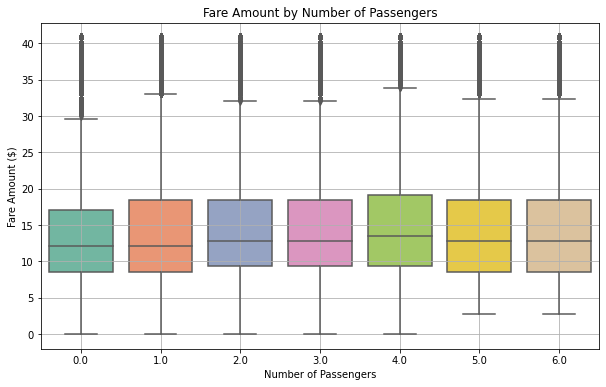

In [42]:
# Show relationship between fare and number of passengers

# Box plot to show fare amount distribution per passenger count
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered_no_outliers, x='passenger_count', y='fare_amount', palette='Set2')

plt.title('Fare Amount by Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


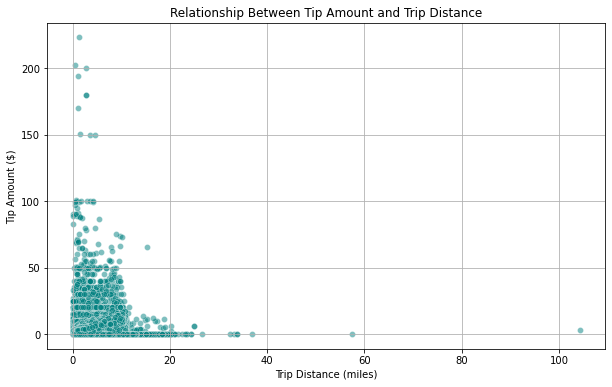

In [43]:
# Show relationship between tip and trip distance

# Filter out zero distances and negative tips
df_tips = df_filtered_no_outliers[
    (df_filtered_no_outliers['trip_distance'] > 0) & 
    (df_filtered_no_outliers['tip_amount'] >= 0)
]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tips, x='trip_distance', y='tip_amount', alpha=0.5, color='teal')

plt.title('Relationship Between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

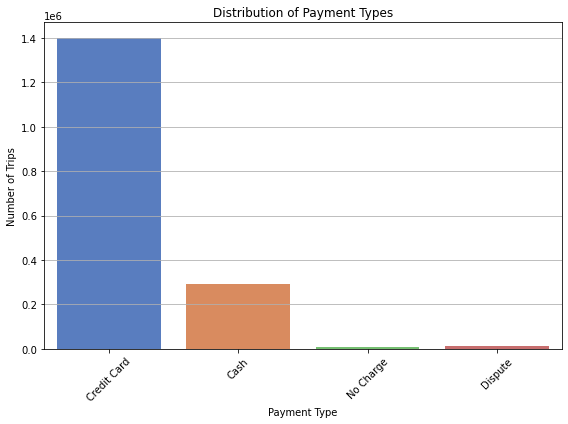

In [44]:
# Analyse the distribution of different payment types (payment_type).

# Map payment_type codes to labels
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Count payment types and apply labels
payment_counts = df_filtered_no_outliers['payment_type'].value_counts().sort_index()
payment_counts_labeled = payment_counts.rename(index=payment_labels)

# Plot the payment type distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts_labeled.index, y=payment_counts_labeled.values, palette='muted')

plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [45]:
# !pip install geopandas

#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [67]:
# import geopandas as gpd

import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('C:/Users/Dharm/AIML/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.770 256767.698, 1026495.593 ...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.310 144283.336, 936046.565 14...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<AxesSubplot:>

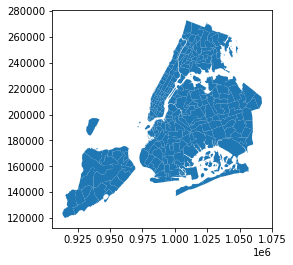

In [68]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [69]:
# Merge zones and trip records using locationID and PULocationID

merged_gdf = df_filtered_no_outliers.merge(zones,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

merged_gdf

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
...           ...                  ...                   ...              ...   
1707753         2  2023-09-29 23:39:12   2023-09-29 23:55:07              5.0   
1707754         2  2023-09-29 23:26:39   2023-09-29 23:46:16              1.0   
1707755         1  2023-09-29 23:10:24   2023-09-29 23:17:47              1.0   
1707756         1  2023-09-29 23:42:35   2023-09-30 00:01:34              1.0   
1707757         2  2023-09-29 23:42:53   2023-09-30 00:03:59              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74           1                  N           138   
1                 1.24           1                  N           161   
2                 1.44           1                  N           237   
3                 0.54           1                  N           143   
4                 7.10           1                  N           246   
...                ...         ...                ...           ...   
1707753           3.32           1                  N           249   
1707754           5.89           1                  N           148   
1707755           1.30           1                  N            45   
1707756           9.50           1                  N           138   
1707757           4.05           1                  N           148   

         DOLocationID  payment_type  ...  pickup_month  quarter  \
0                 256             2  ...             1       Q1   
1                 237             1  ...             1       Q1   
2                 141             2  ...             1       Q1   
3                 142             2  ...             1       Q1   
4                  37             1  ...             1       Q1   
...               ...           ...  ...           ...      ...   
1707753            48             1  ...             9       Q3   
1707754           236             1  ...             9       Q3   
1707755            79             2  ...             9       Q3   
1707756           229             1  ...             9       Q3   
1707757            50             1  ...             9       Q3   

         trip_duration  OBJECTID  Shape_Leng  Shape_Area  \
0            15.950000     138.0    0.107467    0.000537   
1             5.083333     161.0    0.035804    0.000072   
2            10.550000     237.0    0.042213    0.000096   
3             5.416667     143.0    0.054180    0.000151   
4            33.616667     246.0    0.069467    0.000281   
...                ...       ...         ...         ...   
1707753      15.916667     249.0    0.036384    0.000072   
1707754      19.616667     148.0    0.039131    0.000070   
1707755       7.383333      45.0    0.045907    0.000091   
1707756      18.983333     138.0    0.107467    0.000537   
1707757      21.100000     148.0    0.039131    0.000070   

                              zone  LocationID    borough  \
0                LaGuardia Airport       138.0     Queens   
1                   Midtown Center       161.0  Manhattan   
2            Upper East Side South       237.0  Manhattan   
3              Lincoln Square West       143.0  Manhattan   
4        West Chelsea/Hudson Yards       246.0  Manhattan   
...                            ...         ...        ...   
1707753               West Village       249.0  Manhattan   
1707754            Lower East Side       148.0  Manhattan   
1707755                  Chinatown        45.0  Manhattan   
1707756          LaGuardia Airport       138.0 

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [70]:
# Group data by location and calculate the number of trips

pickup_counts = merged_gdf.groupby('zone').size().reset_index(name='num_trips')

# Sort by most trips
pickup_counts = pickup_counts.sort_values(by='num_trips', ascending=False)

# Preview
pickup_counts.head()


zone  num_trips
218         Upper East Side South      89495
145                Midtown Center      85062
217         Upper East Side North      80021
146                  Midtown East      65741
170  Penn Station/Madison Sq West      63794

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [71]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(pickup_counts, on='zone', how='left')

# Fill NaN trip counts with 0 (for zones with no pickups)
zones['num_trips'] = zones['num_trips'].fillna(0)

zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.770 256767.698, 1026495.593 ...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.310 144283.336, 936046.565 14...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     num_trips  
0         15.0  
1          0.0  
2         24.0  
3       1878.0  
4          0.0  
..         ...  
258       22.0  
259      242.0  
260     9011.0  
261    24291.0  
262    35890.0  

[263 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

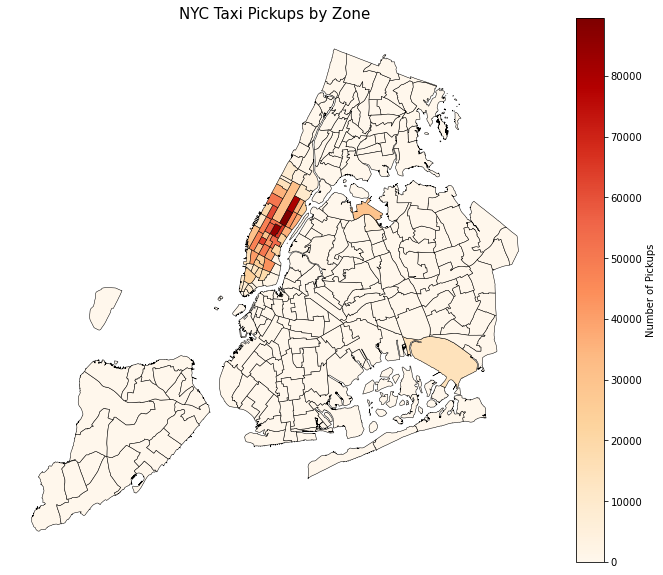

In [72]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
#  Plot the GeoDataFrame
zones.plot(
    column='num_trips',         # Column to color by
    ax=ax,                      # Axis to plot on
    legend=True,                # Show color bar
    cmap='OrRd',                # Color map
    edgecolor='black',          # Zone borders
    linewidth=0.5,              # Border thickness
    legend_kwds={
        'label': "Number of Pickups",
        'orientation': "vertical"
    }
)

# Add a title and remove axis
ax.set_title("NYC Taxi Pickups by Zone", fontsize=15)
ax.axis('off')  # Hide axis ticks

# Show plot
plt.show()


In [73]:
# can you try displaying the zones DF sorted by the number of trips?


sorted_zones = zones.sort_values(by='num_trips', ascending=False)

# Display the top 10 zones
sorted_zones[['zone', 'borough', 'num_trips']].head(10)

zone    borough  num_trips
236         Upper East Side South  Manhattan    89495.0
160                Midtown Center  Manhattan    85062.0
235         Upper East Side North  Manhattan    80021.0
161                  Midtown East  Manhattan    65741.0
185  Penn Station/Madison Sq West  Manhattan    63794.0
141           Lincoln Square East  Manhattan    61827.0
229     Times Sq/Theatre District  Manhattan    57602.0
169                   Murray Hill  Manhattan    54592.0
162                 Midtown North  Manhattan    53036.0
238         Upper West Side South  Manhattan    51219.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [74]:
# Find routes which have the slowest speeds at different times of the day

# 1. Calculate trip duration in minutes
df_filtered_no_outliers['trip_duration'] = (
    df_filtered_no_outliers['tpep_dropoff_datetime'] - df_filtered_no_outliers['tpep_pickup_datetime']
).dt.total_seconds() / 60  # duration in minutes

# 2. Extract pickup hour
df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour

# 3. Group by route and hour to get average trip duration and distance
route_hour_stats = df_filtered_no_outliers.groupby(
    ['PULocationID', 'DOLocationID', 'pickup_hour']
).agg(
    avg_trip_duration=('trip_duration', 'mean'),
    avg_distance=('trip_distance', 'mean'),
    trip_count=('trip_duration', 'count')
).reset_index()

# 4. Calculate average speed (mph)
route_hour_stats['avg_speed_mph'] = route_hour_stats['avg_distance'] / (route_hour_stats['avg_trip_duration'] / 60)

# 5. Filter routes with a reasonable number of trips to avoid noise (e.g., at least 10 trips)
min_trips = 10
filtered_routes = route_hour_stats[route_hour_stats['trip_count'] >= min_trips]

# 6. Find slowest routes for each hour (e.g. lowest 5 speeds per hour)
slowest_routes_per_hour = (
    filtered_routes
    .sort_values(['pickup_hour', 'avg_speed_mph'])
    .groupby('pickup_hour')
    .head(5)
    .reset_index(drop=True)
)

# Display slowest routes by hour
slowest_routes_per_hour

<ipython-input-74-e6cbbbb0042a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['trip_duration'] = (
<ipython-input-74-e6cbbbb0042a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour


PULocationID  DOLocationID  pickup_hour  avg_trip_duration  avg_distance  \
0             158           100            0         140.950000      1.998182   
1             231           231            0          44.930882      0.674118   
2             100           234            0          74.740476      1.159048   
3             234           113            0          46.542157      0.860000   
4             107           137            0          39.139837      0.755122   
..            ...           ...          ...                ...           ...   
115           148            45           23         109.140476      0.846429   
116           113             4           23         118.723077      1.136923   
117           233           229           23          61.308000      0.736400   
118           233            48           23         113.430952      1.529286   
119           113            87           23         121.478205      2.344615   

     trip_count  avg_speed_mph  
0            11       0.850592  
1            34       0.900206  
2            21       0.930458  
3            34       1.108672  
4            41       1.157576  
..          ...            ...  
115          14       0.465324  
116          13       0.574576  
117          25       0.720689  
118          14       0.808925  
119          13       1.158042  

[120 rows x 7 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

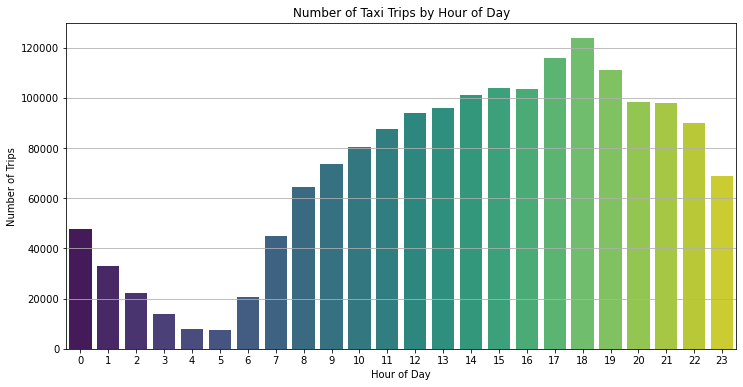

In [76]:
# Visualise the number of trips per hour and find the busiest hour

# Count trips per hour
trips_per_hour = df_filtered_no_outliers['pickup_hour'].value_counts().sort_index()
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Taxi Trips by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [77]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.2 

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:/Users/Dharm/AIML/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/')
##os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

yearly_sampled_df = []

# iterate through the list of files and sample one by one:
for file_name in file_list:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_df = pd.read_parquet(file_path)
        
        #pick datatime field
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'])
        
        #Extract the data and hours
        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour
        
        #Get unique dates in the month
        
        unique_dates = monthly_df['pickup_date'].unique()



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = [] ##monthly_sampled_df

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            daily_df = monthly_df[monthly_df['pickup_date'] == date]
            
            #sampled hourly data for this date
            sampled_day_df = []

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_df = daily_df[daily_df['pickup_hour'] == hour]

                # Sample 5% of the hourly data randomly
                if not hourly_df.empty:
                    sampled_hour = hourly_df.sample(frac=sample_fraction ,random_state=42)
                    sampled_day_df.append(sampled_hour)

            # add data of this hour to the dataframe
            if sampled_day_df:
                full_day_sample = pd.concat(sampled_day_df, ignore_index=True)
                sampled_data.append(full_day_sample)
        # concat 
        if sampled_data:
            full_month_sample = pd.concat(sampled_data,ignore_index=True)
            yearly_sampled_df.append(full_month_sample)

# Concatenate the sampled data of all the dates to a single dataframe
df = pd.concat(yearly_sampled_df, ignore_index=True)
print(f"\n Final sampled data shape: {df.shape}")



 Final sampled data shape: (7984980, 22)


In [78]:
# df.to_parquet('')

df.to_parquet('sampled_yearly_data_20.parquet', index=False)

# Load the new data file

df_sampled = pd.read_parquet("sampled_yearly_data_20.parquet")

# Load the new data file

df_sampled = pd.read_parquet("sampled_yearly_data.parquet")

# Combine the two airport fee columns

df_sampled['airport_combined_fee'] = df_sampled['airport_fee'].fillna(0)+df_sampled['Airport_fee'].fillna(0)
df_sampled = df_sampled.drop(columns='airport_fee')
df_sampled = df_sampled.drop(columns='Airport_fee')

# fix these negative values

# converting the negative value to positive values, as there won't be case where a charge can be negative expect discounts

for col in negative_columns:
    df_sampled[col] = df_sampled[col].abs()
    
df_sampled.head()

# Impute NaN values in 'passenger_count'

df_sampled['passenger_count'] = df_sampled['passenger_count'].fillna(df_sampled['passenger_count'].median())


# On obeservation for the all the NaN RatecodeID's i see the payment type as 0. I am fixing the values with 1 as standard Rate code

df_sampled['RatecodeID'] = df_sampled['RatecodeID'].fillna(1)
df_sampled['RatecodeID'] = df_sampled['RatecodeID'].astype(int)

# handle null values in congestion_surcharge

df_sampled['congestion_surcharge'] = df_sampled['congestion_surcharge'].fillna(0.0)

# Fixing None values with 'N' as it makes sense to keep N as it is not known if they had stored it or not.

df_sampled['store_and_fwd_flag'] = df_sampled['store_and_fwd_flag'].fillna('N')

# remove passenger_count > 6

df_sampled = df_sampled[df_sampled['passenger_count'] <=6]

#Removing Entries where trip_distance is nearly 0 and fare_amount is more than 300

df_sampled = df_sampled[~((df_sampled['trip_distance'] < 0.1) & (df_sampled['fare_amount'] > 300))]

# Identify the records where both trip_distance and fare_amount are 0, and pickup and dropoff zones are different
invalid_entries = df_sampled[
    (df_sampled['trip_distance'] == 0) & 
    (df_sampled['fare_amount'] == 0) & 
    (df_sampled['PULocationID'] != df_sampled['DOLocationID'])
]

# Drop these entries
df_sampled = df_sampled.drop(invalid_entries.index)

#Drop Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)

df_sampled = df_sampled[df_sampled['payment_type'] != 0]


#Drop Entries where trip distance is >=250

df_sampled = df_sampled[df_sampled['trip_distance'] <250]

# Filter out rows with zero or negative values in financial columns, but keep zero trip distances
df_filtered = df_sampled[
    (df_sampled['fare_amount'] > 0) & 
    (df_sampled['tip_amount'] >= 0) & 
    (df_sampled['total_amount'] > 0) & 
    (df_sampled['trip_distance'] >= 0)
]

df_filtered

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
...           ...                  ...                   ...              ...   
1996072         2  2023-09-29 23:39:12   2023-09-29 23:55:07              5.0   
1996073         2  2023-09-29 23:26:39   2023-09-29 23:46:16              1.0   
1996074         1  2023-09-29 23:10:24   2023-09-29 23:17:47              1.0   
1996075         1  2023-09-29 23:42:35   2023-09-30 00:01:34              1.0   
1996076         2  2023-09-29 23:42:53   2023-09-30 00:03:59              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74           1                  N           138   
1                 1.24           1                  N           161   
2                 1.44           1                  N           237   
3                 0.54           1                  N           143   
5                 7.10           1                  N           246   
...                ...         ...                ...           ...   
1996072           3.32           1                  N           249   
1996073           5.89           1                  N           148   
1996074           1.30           1                  N            45   
1996075           9.50           1                  N           138   
1996076           4.05           1                  N           148   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                 256             2  ...   6.00      0.5        0.00   
1                 237             1  ...   1.00      0.5        2.58   
2                 141             2  ...   1.00      0.5        0.00   
3                 142             2  ...   1.00      0.5        0.00   
5                  37             1  ...   3.50      0.5        7.90   
...               ...           ...  ...    ...      ...         ...   
1996072            48             1  ...   1.00      0.5        4.68   
1996073           236             1  ...   1.00      0.5        6.50   
1996074            79             2  ...   3.50      0.5        0.00   
1996075           229             1  ...  10.25      0.5        3.00   
1996076            50             1  ...   1.00      0.5        5.52   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         41.15   
1                0.00                    1.0         15.48   
2                0.00                    1.0         16.40   
3                0.00                    1.0         11.50   
5                0.00                    1.0         47.40   
...               ...                    ...           ...   
1996072          0.00                    1.0         28.08   
1996073          0.00                    1.0         39.00   
1996074          0.00                    1.0         14.30   
1996075          6.94                    1.0         60.39   
1996076          0.00                    1.0         33.12   

         congestion_surcharge  pickup_date pickup_hour  airport_combined_fee  
0                         0.0   2023-01-01           0                  1.25  
1                         2.5   2023-01-01           0                  0.00  
2                         2.5   2023-01-01           0                  0.00  
3                         2.5   2023-01-01           0                  0.00  
5                         2.5   2023-01-01           0                  0.00  
...                       ...          ...         ...                   ...  
1996072             

In [79]:
# Filter out trips with trip_distance = 0
df_filtered_nonzero_distance = df_filtered[df_filtered['trip_distance'] > 0]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for fare_amount
Q1 = df_filtered_nonzero_distance['fare_amount'].quantile(0.25)
Q3 = df_filtered_nonzero_distance['fare_amount'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered_no_outliers = df_filtered_nonzero_distance[
    (df_filtered_nonzero_distance['fare_amount'] >= lower_bound) & 
    (df_filtered_nonzero_distance['fare_amount'] <= upper_bound)
]

df_filtered_no_outliers

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
...           ...                  ...                   ...              ...   
1996072         2  2023-09-29 23:39:12   2023-09-29 23:55:07              5.0   
1996073         2  2023-09-29 23:26:39   2023-09-29 23:46:16              1.0   
1996074         1  2023-09-29 23:10:24   2023-09-29 23:17:47              1.0   
1996075         1  2023-09-29 23:42:35   2023-09-30 00:01:34              1.0   
1996076         2  2023-09-29 23:42:53   2023-09-30 00:03:59              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 7.74           1                  N           138   
1                 1.24           1                  N           161   
2                 1.44           1                  N           237   
3                 0.54           1                  N           143   
5                 7.10           1                  N           246   
...                ...         ...                ...           ...   
1996072           3.32           1                  N           249   
1996073           5.89           1                  N           148   
1996074           1.30           1                  N            45   
1996075           9.50           1                  N           138   
1996076           4.05           1                  N           148   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                 256             2  ...   6.00      0.5        0.00   
1                 237             1  ...   1.00      0.5        2.58   
2                 141             2  ...   1.00      0.5        0.00   
3                 142             2  ...   1.00      0.5        0.00   
5                  37             1  ...   3.50      0.5        7.90   
...               ...           ...  ...    ...      ...         ...   
1996072            48             1  ...   1.00      0.5        4.68   
1996073           236             1  ...   1.00      0.5        6.50   
1996074            79             2  ...   3.50      0.5        0.00   
1996075           229             1  ...  10.25      0.5        3.00   
1996076            50             1  ...   1.00      0.5        5.52   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         41.15   
1                0.00                    1.0         15.48   
2                0.00                    1.0         16.40   
3                0.00                    1.0         11.50   
5                0.00                    1.0         47.40   
...               ...                    ...           ...   
1996072          0.00                    1.0         28.08   
1996073          0.00                    1.0         39.00   
1996074          0.00                    1.0         14.30   
1996075          6.94                    1.0         60.39   
1996076          0.00                    1.0         33.12   

         congestion_surcharge  pickup_date pickup_hour  airport_combined_fee  
0                         0.0   2023-01-01           0                  1.25  
1                         2.5   2023-01-01           0                  0.00  
2                         2.5   2023-01-01           0                  0.00  
3                         2.5   2023-01-01           0                  0.00  
5                         2.5   2023-01-01           0                  0.00  
...                       ...          ...         ...                   ...  
1996072             

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<ipython-input-80-1a9362282276>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['day_of_week'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.dayofweek
<ipython-input-80-1a9362282276>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['is_weekend'] = df_filtered_no_outliers['day_of_week'].isin([5, 6])


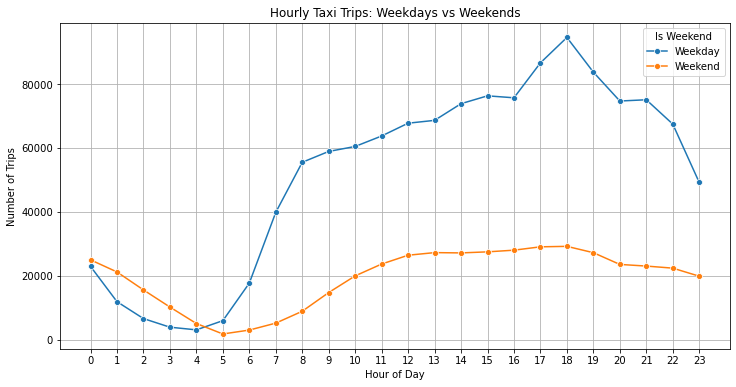

In [80]:
# Compare traffic trends for the week days and weekends

# Extract day of week (Monday=0, Sunday=6)
df_filtered_no_outliers['day_of_week'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.dayofweek

# Create a flag for weekend (Saturday=5, Sunday=6)
df_filtered_no_outliers['is_weekend'] = df_filtered_no_outliers['day_of_week'].isin([5, 6])

# Group by pickup_hour and weekend flag; count trips
hourly_counts = df_filtered_no_outliers.groupby(['pickup_hour', 'is_weekend']).size().reset_index(name='num_trips')

plt.figure(figsize=(12,6))

sns.lineplot(data=hourly_counts, x='pickup_hour', y='num_trips', hue='is_weekend', marker='o')

plt.xticks(range(0, 24))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Taxi Trips: Weekdays vs Weekends')
plt.legend(title='Is Weekend', labels=['Weekday', 'Weekend'])
plt.grid(True)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [83]:
# Find top 10 pickup and dropoff zones

df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour
df_filtered_no_outliers['dropoff_hour'] = df_filtered_no_outliers['tpep_dropoff_datetime'].dt.hour

# Pickups grouped by PULocationID and hour
pickup_counts = df_filtered_no_outliers.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='num_pickups')

top10_pickup_zones = (
    pickup_counts.groupby('PULocationID')['num_pickups']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)

pickup_top_zones = pickup_counts[pickup_counts['PULocationID'].isin(top10_pickup_zones)]

# Dropoffs grouped by DOLocationID and hour
dropoff_counts = df_filtered_no_outliers.groupby(['DOLocationID', 'dropoff_hour']).size().reset_index(name='num_dropoffs')

# Top 10 dropoff zones by total dropoffs
top10_dropoff_zones = (
    dropoff_counts.groupby('DOLocationID')['num_dropoffs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)

# Filter dropoff data for these zones
dropoff_top_zones = dropoff_counts[dropoff_counts['DOLocationID'].isin(top10_dropoff_zones)]

print(pickup_top_zones,dropoff_top_zones)


<ipython-input-83-1ffb6576f9d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour
<ipython-input-83-1ffb6576f9d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['dropoff_hour'] = df_filtered_no_outliers['tpep_dropoff_datetime'].dt.hour


      PULocationID  pickup_hour  num_pickups
2144           142            0         1118
2145           142            1          435
2146           142            2          176
2147           142            3           70
2148           142            4           63
...            ...          ...          ...
3794           239           19         3117
3795           239           20         2522
3796           239           21         2582
3797           239           22         2275
3798           239           23         1249

[240 rows x 3 columns]       DOLocationID  dropoff_hour  num_dropoffs
1226            68             0          1395
1227            68             1          1029
1228            68             2           703
1229            68             3           505
1230            68             4           283
...            ...           ...           ...
4625           239            19          3793
4626           239            20          3296
4627         

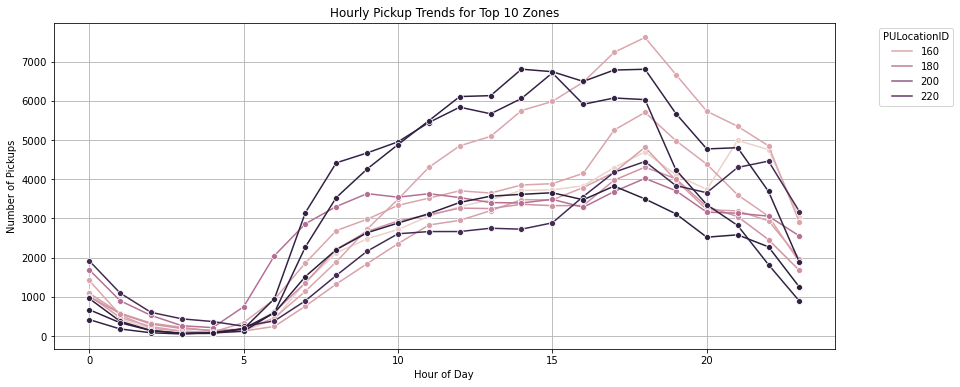

In [84]:
#plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_top_zones, x='pickup_hour', y='num_pickups', hue='PULocationID', marker='o')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='PULocationID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Plot Dropoff Trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_top_zones, x='dropoff_hour', y='num_dropoffs', hue='DOLocationID', marker='o')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.legend(title='DOLocationID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [85]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Total pickups per zone (PULocationID)
total_pickups = df_filtered_no_outliers.groupby('PULocationID').size().reset_index(name='total_pickups')

# Total dropoffs per zone (DOLocationID)
total_dropoffs = df_filtered_no_outliers.groupby('DOLocationID').size().reset_index(name='total_dropoffs')

pickup_drop = total_pickups.merge(
    total_dropoffs,
    left_on='PULocationID',
    right_on='DOLocationID',
    how='outer'
).fillna(0)

# Rename columns for clarity
pickup_drop = pickup_drop.rename(columns={'PULocationID': 'LocationID'})
pickup_drop = pickup_drop[['LocationID', 'total_pickups', 'total_dropoffs']]

#calcualte pickup/dropoff ratio
pickup_drop['pickup_drop_ratio'] = pickup_drop['total_pickups'] / pickup_drop['total_dropoffs'].replace(0, 1)

# Sort by ratio descending
sorted_ratios = pickup_drop.sort_values('pickup_drop_ratio', ascending=False)

# Top 10 highest ratios
top_10_highest = sorted_ratios.head(10)

# Top 10 lowest ratios
top_10_lowest = sorted_ratios.tail(10)

print("Top 10 zones with highest pickup/dropoff ratio:")
print(top_10_highest)

print("\nTop 10 zones with lowest pickup/dropoff ratio:")
print(top_10_lowest)



Top 10 zones with highest pickup/dropoff ratio:
     LocationID  total_pickups  total_dropoffs  pickup_drop_ratio
119       132.0        14694.0          1755.0           8.372650
65         70.0         4134.0           523.0           7.904398
125       138.0        30209.0          6797.0           4.444461
20         23.0            5.0             2.0           2.500000
39         44.0            2.0             1.0           2.000000
188       204.0            2.0             1.0           2.000000
171       186.0        63794.0         40052.0           1.592779
102       114.0        24760.0         17637.0           1.403867
38         43.0        31446.0         22637.0           1.389142
230       249.0        41504.0         30726.0           1.350778

Top 10 zones with lowest pickup/dropoff ratio:
     LocationID  total_pickups  total_dropoffs  pickup_drop_ratio
246         0.0            0.0             2.0                0.0
247         0.0            0.0            15.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [88]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour
df_filtered_no_outliers['dropoff_hour'] = df_filtered_no_outliers['tpep_dropoff_datetime'].dt.hour

#filter for night hours

night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter pickups during night
night_pickups = df_filtered_no_outliers[df_filtered_no_outliers['pickup_hour'].isin(night_hours)]

# Filter dropoffs during night
night_dropoffs = df_filtered_no_outliers[df_filtered_no_outliers['dropoff_hour'].isin(night_hours)]

# Count night pickups by PULocationID
night_pickup_counts = night_pickups['PULocationID'].value_counts().reset_index()
night_pickup_counts.columns = ['LocationID', 'night_pickup_count']

# Count night dropoffs by DOLocationID
night_dropoff_counts = night_dropoffs['DOLocationID'].value_counts().reset_index()
night_dropoff_counts.columns = ['LocationID', 'night_dropoff_count']

# Merge with zone names
night_pickup_counts = night_pickup_counts.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
night_dropoff_counts = night_dropoff_counts.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

print("Top 10 Pickup Zones (Night Hours):")
print(night_pickup_counts.head(10))

print("\nTop 10 Dropoff Zones (Night Hours):")
print(night_dropoff_counts.head(10))


Top 10 Pickup Zones (Night Hours):
   LocationID  night_pickup_count                          zone
0          79               15985                  East Village
1         249               12788                  West Village
2          48               10396                  Clinton East
3         148                9866               Lower East Side
4         114                8981       Greenwich Village South
5         230                7858     Times Sq/Theatre District
6         186                6900  Penn Station/Madison Sq West
7         164                6134                 Midtown South
8          68                5979                  East Chelsea
9         107                5722                      Gramercy

Top 10 Dropoff Zones (Night Hours):
   LocationID  night_dropoff_count                           zone
0          79                 8974                   East Village
1          48                 7233                   Clinton East
2         170             

<ipython-input-88-8748b97cf3a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour
<ipython-input-88-8748b97cf3a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['dropoff_hour'] = df_filtered_no_outliers['tpep_dropoff_datetime'].dt.hour


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [89]:
# Filter for night hours (11 PM to 5 AM)

df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour


night_hours = [23, 0, 1, 2, 3, 4, 5]

# Boolean masks
is_night = df_filtered_no_outliers['pickup_hour'].isin(night_hours)
is_day = ~is_night

# Total revenue
total_revenue = df_filtered_no_outliers['total_amount'].sum()

# Revenue from night trips
night_revenue = df_filtered_no_outliers[is_night]['total_amount'].sum()

# Revenue from day trips
day_revenue = df_filtered_no_outliers[is_day]['total_amount'].sum()

night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Nighttime revenue share: {night_share:.2f}%")
print(f"Daytime revenue share: {day_share:.2f}%")


<ipython-input-89-f0fc0a4223bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour


Nighttime revenue share: 12.25%
Daytime revenue share: 87.75%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [90]:
# Analyse the fare per mile per passenger for different passenger counts

df_valid = df_filtered_no_outliers[
    (df_filtered_no_outliers['fare_amount'] > 0) &
    (df_filtered_no_outliers['trip_distance'] > 0) &
    (df_filtered_no_outliers['passenger_count'] > 0)
]


#group by passenger count and compute averages

grouped = df_valid.groupby('passenger_count').agg(
    avg_fare=('fare_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()


#Calculate fare per mile per passenger

grouped['fare_per_mile_per_passenger'] = grouped['avg_fare'] / (grouped['avg_distance'] * grouped['passenger_count'])

print(grouped[['passenger_count', 'fare_per_mile_per_passenger']])


   passenger_count  fare_per_mile_per_passenger
0              1.0                     6.644228
1              2.0                     3.345445
2              3.0                     2.260022
3              4.0                     1.698002
4              5.0                     1.322202
5              6.0                     1.120707


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [92]:
# Compare the average fare per mile for different days and for different times of the day

df_valid = df_filtered_no_outliers[
    (df_filtered_no_outliers['fare_amount'] > 0) &
    (df_filtered_no_outliers['trip_distance'] > 0)
]


df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour
df_valid['day_of_week'] = df_valid['tpep_pickup_datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

#by houre of the day

fare_per_mile_by_hour = df_valid.groupby('pickup_hour').agg(
    avg_fare=('fare_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()

fare_per_mile_by_hour['fare_per_mile'] = fare_per_mile_by_hour['avg_fare'] / fare_per_mile_by_hour['avg_distance']
print(fare_per_mile_by_hour)
#by day of the week

fare_per_mile_by_day = df_valid.groupby('day_of_week').agg(
    avg_fare=('fare_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()

fare_per_mile_by_day['fare_per_mile'] = fare_per_mile_by_day['avg_fare'] / fare_per_mile_by_day['avg_distance']
print(fare_per_mile_by_day)

    pickup_hour   avg_fare  avg_distance  fare_per_mile
0             0  15.175386      2.691122       5.639055
1             1  14.617908      2.618325       5.582925
2             2  14.450397      2.635405       5.483180
3             3  14.434773      2.676894       5.392359
4             4  15.715599      3.072503       5.114918
5             5  14.698903      2.898800       5.070686
6             6  13.309921      2.424772       5.489143
7             7  13.262151      2.167386       6.118962
8             8  13.885966      2.077877       6.682767
9             9  14.301793      2.088171       6.848955
10           10  14.449747      2.076584       6.958423
11           11  14.679652      2.033561       7.218691
12           12  14.777851      2.026853       7.291034
13           13  14.732949      2.022367       7.285004
14           14  14.909244      2.034776       7.327217
15           15  14.791858      1.995653       7.412039
16           16  14.770023      2.009538       7

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [94]:
# Compare fare per mile for different vendors
df_valid = df_filtered_no_outliers[
    (df_filtered_no_outliers['fare_amount'] > 0) &
    (df_filtered_no_outliers['trip_distance'] > 0)
]

df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour

#group by vendor id and hour
vendor_hour_fare = df_valid.groupby(['VendorID', 'pickup_hour']).agg(
    avg_fare=('fare_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()

# Calculate fare per mile
vendor_hour_fare['fare_per_mile'] = vendor_hour_fare['avg_fare'] / vendor_hour_fare['avg_distance']

plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hour_fare, x='pickup_hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Hour for Each Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Vendor ID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [95]:
# Defining distance tiers

df_valid = df_filtered_no_outliers[
    (df_filtered_no_outliers['fare_amount'] > 0) &
    (df_filtered_no_outliers['trip_distance'] > 0)
]

#define distance tiers

def distance_tier(miles):
    if miles <= 2:
        return '≤2 miles'
    elif 2 < miles <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

df_valid['distance_tier'] = df_valid['trip_distance'].apply(distance_tier)

#Group by vendor and distance tier

tiered_fare = df_valid.groupby(['VendorID', 'distance_tier']).agg(
    avg_fare=('fare_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()

# Calculate average fare per mile
tiered_fare['fare_per_mile'] = tiered_fare['avg_fare'] / tiered_fare['avg_distance']


# Pivot for easier comparison
fare_comparison = tiered_fare.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile').round(2)
print("Average Fare per Mile by Vendor and Distance Tier:")
print(fare_comparison)


Average Fare per Mile by Vendor and Distance Tier:
VendorID          1     2
distance_tier            
2-5 miles      6.22  6.38
>5 miles       4.48  4.63
≤2 miles       8.67  8.74


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

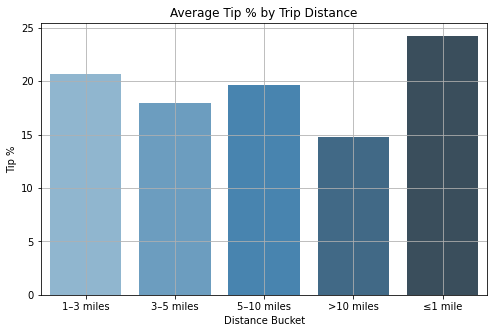

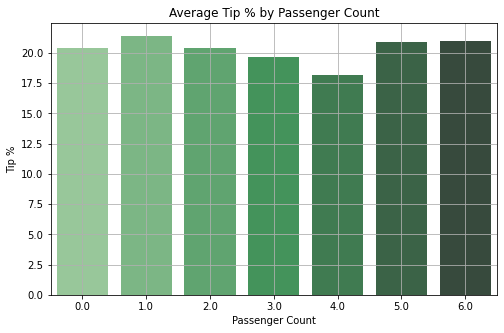

In [97]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



df_tips = df_filtered_no_outliers[
    (df_filtered_no_outliers['fare_amount'] > 0)
]

df_tips['tip_percent'] = (df_tips['tip_amount'] / df_tips['fare_amount']) * 100

#tip % by trip distance tier
def distance_bucket(d):
    if d <= 1:
        return '≤1 mile'
    elif d <= 3:
        return '1–3 miles'
    elif d <= 5:
        return '3–5 miles'
    elif d <= 10:
        return '5–10 miles'
    else:
        return '>10 miles'

df_tips['distance_bucket'] = df_tips['trip_distance'].apply(distance_bucket)

tip_by_distance = df_tips.groupby('distance_bucket')['tip_percent'].mean().reset_index()

#tip % by Passenger count

tip_by_passenger = df_tips.groupby('passenger_count')['tip_percent'].mean().reset_index()


#tip % by PICKUP HOUR

df_tips['pickup_hour'] = df_tips['tpep_pickup_datetime'].dt.hour
tip_by_hour = df_tips.groupby('pickup_hour')['tip_percent'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=tip_by_distance, x='distance_bucket', y='tip_percent', palette='Blues_d')
plt.title('Average Tip % by Trip Distance')
plt.xlabel('Distance Bucket')
plt.ylabel('Tip %')
plt.grid(True)
plt.show()


plt.figure(figsize=(8,5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percent', palette='Greens_d')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip %')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percent', marker='o')
plt.title('Average Tip % by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Tip %')
plt.grid(True)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [99]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df_tips = df_filtered_no_outliers[
    (df_filtered_no_outliers['fare_amount'] > 0)
].copy()

df_tips['tip_percent'] = (df_tips['tip_amount'] / df_tips['fare_amount']) * 100


#split into tow grop low_tip and high_tip

low_tip = df_tips[df_tips['tip_percent'] < 10]
high_tip = df_tips[df_tips['tip_percent'] > 25]

#Compare summary statistics
compare_fields = ['trip_distance', 'fare_amount', 'passenger_count', 'total_amount', 'payment_type']

low_summary = low_tip[compare_fields].describe().T
high_summary = high_tip[compare_fields].describe().T

comparison = low_summary[['mean']].rename(columns={'mean': 'Low Tip % (<10%)'}).join(
    high_summary[['mean']].rename(columns={'mean': 'High Tip % (>25%)'})
)

print("Comparison of Low vs High Tip Trips:")
print(comparison.round(2))



Comparison of Low vs High Tip Trips:
                 Low Tip % (<10%)  High Tip % (>25%)
trip_distance                2.28               1.78
fare_amount                 15.09              12.32
passenger_count              1.40               1.34
total_amount                20.03              21.32
payment_type                 1.78               1.00


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<ipython-input-100-eb192460d1ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour
<ipython-input-100-eb192460d1ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers['pickup_day'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.dayofweek  # 0=Mon, 6=Sun


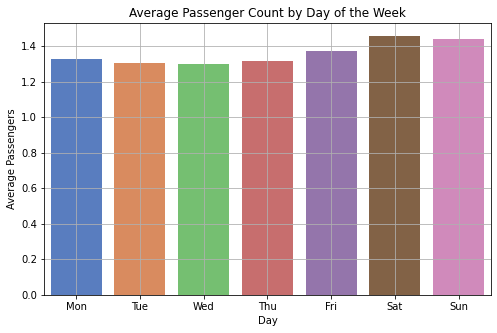

In [100]:
# See how passenger count varies across hours and days

df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour
df_filtered_no_outliers['pickup_day'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.dayofweek  # 0=Mon, 6=Sun

#Gropou and cal avg
#Avg passenger count by hour

hourly_passenger = df_filtered_no_outliers.groupby('pickup_hour')['passenger_count'].mean().reset_index()

#avg passenger count by day

daily_passenger = df_filtered_no_outliers.groupby('pickup_day')['passenger_count'].mean().reset_index()
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_passenger['day_name'] = daily_passenger['pickup_day'].map(dict(enumerate(day_labels)))

plt.figure(figsize=(8, 5))
sns.barplot(data=daily_passenger, x='day_name', y='passenger_count', palette='muted')
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Passengers')
plt.grid(True)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

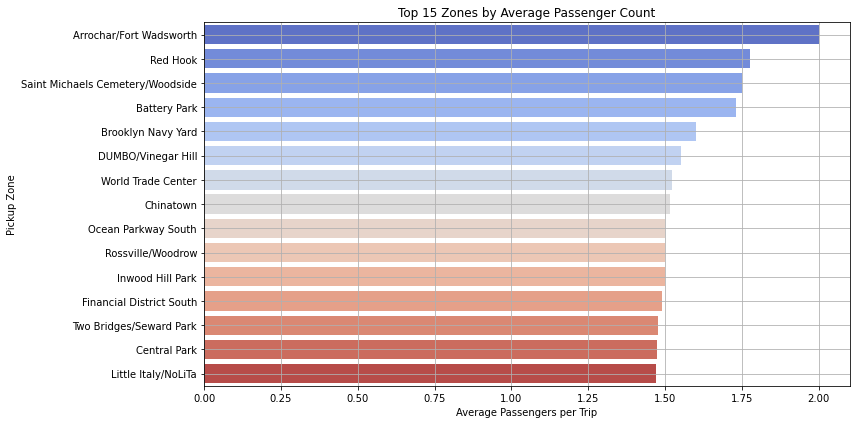

In [102]:
# How does passenger count vary across zones

df_with_zones = df_filtered_no_outliers.merge(
    zones[['LocationID', 'zone']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)

#Group by zone
passenger_by_zone = df_with_zones.groupby('zone')['passenger_count'].mean().reset_index()
passenger_by_zone = passenger_by_zone.sort_values(by='passenger_count', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=passenger_by_zone.head(15), x='passenger_count', y='zone', palette='coolwarm')
plt.title('Top 15 Zones by Average Passenger Count')
plt.xlabel('Average Passengers per Trip')
plt.ylabel('Pickup Zone')
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

#cal avg passenger count per zone

avg_passenger_per_zone = df_filtered_no_outliers.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_per_zone.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'}, inplace=True)

#merge this info inpt zones_with_trips

zones_with_trips = zones.merge(avg_passenger_per_zone, on='LocationID', how='left')

zones_with_trips[['zone', 'num_trips', 'avg_passenger_count']].sort_values(by='avg_passenger_count', ascending=False).head(10)


zone  num_trips  avg_passenger_count
5             Arrochar/Fort Wadsworth       20.0             2.000000
194                          Red Hook       80.0             1.775000
206  Saint Michaels Cemetery/Woodside       12.0             1.750000
11                       Battery Park      792.0             1.731061
33                 Brooklyn Navy Yard       20.0             1.600000
65                 DUMBO/Vinegar Hill      421.0             1.551069
260                World Trade Center     9011.0             1.520919
44                          Chinatown     2377.0             1.514935
203                 Rossville/Woodrow        2.0             1.500000
177               Ocean Parkway South       10.0             1.500000

In [105]:
print(zones_with_trips.columns)

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'num_trips', 'avg_passenger_count'],
      dtype='object')


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [108]:
# How often is each surcharge applied?

#surcharge column
surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_combined_fee']

#calculate how often each surcharge is applie
surcharge_freq = {}

for col in surcharge_cols:
    count_nonzero = (df_filtered_no_outliers[col] > 0).sum()
    prop_nonzero = (df_filtered_no_outliers[col] > 0).mean()
    surcharge_freq[col] = {'count': count_nonzero, 'proportion': prop_nonzero}

surcharge_freq_df = pd.DataFrame(surcharge_freq).T.sort_values(by='proportion', ascending=False)
print(surcharge_freq_df)




                           count  proportion
improvement_surcharge  1707668.0    0.999989
mta_tax                1706019.0    0.999024
congestion_surcharge   1632866.0    0.956186
extra                  1067595.0    0.625171
airport_combined_fee     46777.0    0.027392


<ipython-input-110-c6a43635cb78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers[f'{col}_applied'] = (df_filtered_no_outliers[col] > 0).astype(int)
<ipython-input-110-c6a43635cb78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_outliers[f'{col}_applied'] = (df_filtered_no_outliers[col] > 0).astype(int)
<ipython-input-110-c6a43635cb78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

   PULocationID  extra_applied  mta_tax_applied  \
0             1       0.066667         0.266667   
1             3       0.000000         1.000000   
2             4       0.825879         0.998935   
3             6       0.550000         1.000000   
4             7       0.455923         1.000000   

   improvement_surcharge_applied  congestion_surcharge_applied  \
0                            1.0                      0.000000   
1                            1.0                      0.000000   
2                            1.0                      0.981896   
3                            1.0                      0.000000   
4                            1.0                      0.268595   

   airport_combined_fee_applied                     zone  
0                           0.0           Newark Airport  
1                           0.0  Allerton/Pelham Gardens  
2                           0.0            Alphabet City  
3                           0.0  Arrochar/Fort Wadsworth  
4

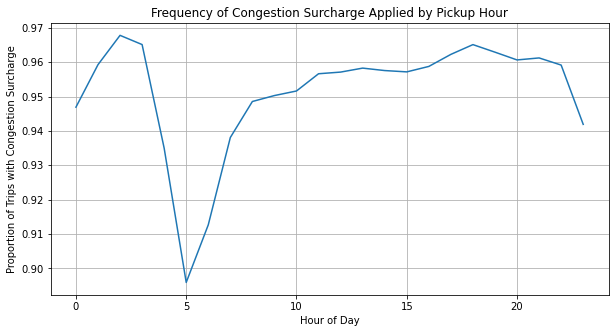

In [110]:
# Create indicator columns if surcharge is applied
for col in surcharge_cols:
    df_filtered_no_outliers[f'{col}_applied'] = (df_filtered_no_outliers[col] > 0).astype(int)

# Group by PULocationID to get mean (frequency) of surcharge application
pickup_surcharge_freq = df_filtered_no_outliers.groupby('PULocationID')[[f'{col}_applied' for col in surcharge_cols]].mean()

# Optional: Add zone names if zones dataframe is available
pickup_surcharge_freq = pickup_surcharge_freq.reset_index().merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
pickup_surcharge_freq.drop(columns=['LocationID'], inplace=True)

print(pickup_surcharge_freq.head())


#analyze surcharge feq by hour of pickup

df_filtered_no_outliers['pickup_hour'] = df_filtered_no_outliers['tpep_pickup_datetime'].dt.hour

hourly_surcharge_freq = df_filtered_no_outliers.groupby('pickup_hour')[[f'{col}_applied' for col in surcharge_cols]].mean()
print(hourly_surcharge_freq)

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_surcharge_freq, x=hourly_surcharge_freq.index, y='congestion_surcharge_applied')
plt.title('Frequency of Congestion Surcharge Applied by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Trips with Congestion Surcharge')
plt.grid(True)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [114]:

"""
1. Deploy more vehicel during peak hours [4PM - 7 PM]
2. Reduce vehicles during the early mornings [3AM - 6 AM]
3. Reduce vehicles dring weekend as there are considerbily less bookings on weekends. 
"""

'\n1. Deploy more vehicel during peak hours [4PM - 7 PM]\n2. Reduce vehicles during the early mornings [3AM - 6 AM]\n3. Reduce vehicles dring weekend as there are considerbily less bookings on weekends. \n'

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [115]:
"""
1. Upper East Side South, Midtown Center and Upper East Side North Zones can be considered as busiest zones, where max number of vechiles need to increased to support demand.
2. Zone 'World trade center' had most booking made. More Vehicles can be placed in this zone.
"""

"\n1. Upper East Side South, Midtown Center and Upper East Side North Zones can be considered as busiest zones, where max number of vechiles need to increased to support demand.\n2. Zone 'World trade center' had most booking made. More Vehicles can be placed in this zone.\n"

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [116]:
"""
1. Strong correlation between trip distance and fare - but with diminishing returns at longer distance.
2. High variablity in fare-per-mile across vendors, especially for shor and long trips
3. Airport routes carry higher surcharges and often include tirps but are underutilized. 
4. Fare-per-mile is inconsistent during high demand hours, especially in congested zones. 
"""

'\n1. Strong correlation between trip distance and fare - but with diminishing returns at longer distance.\n2. High variablity in fare-per-mile across vendors, especially for shor and long trips\n3. Airport routes carry higher surcharges and often include tirps but are underutilized. \n4. Fare-per-mile is inconsistent during high demand hours, especially in congested zones. \n'